In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [41]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species'].values
# Assuming you are using the standard Iris dataset column names:
X_viz = X[['PetalLengthCm', 'PetalWidthCm']]
X_viz_array = X_viz.values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_viz, y, test_size=0.3, random_state=42, stratify=y
)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
k_values = [1, 3, 5, 9, 15, 19]
results = {}


for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    

    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    results[k] = {'accuracy': acc, 'model': knn, 'predictions': y_pred}
    print(f"K={k}: Accuracy = {acc:.4f}")

K=1: Accuracy = 1.0000
K=3: Accuracy = 0.9333
K=5: Accuracy = 0.9111
K=9: Accuracy = 0.9111
K=15: Accuracy = 0.9111
K=19: Accuracy = 0.9111


In [46]:
best_k = 9
final_model = results[best_k]['model']
final_predictions = results[best_k]['predictions']

In [47]:
print(f"\n--- Detailed Evaluation for K={best_k} ---")
print(f"Accuracy: {results[best_k]['accuracy']:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_predictions))
print("\nClassification Report:")
print(classification_report(y_test, final_predictions))


--- Detailed Evaluation for K=9 ---
Accuracy: 0.9111

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



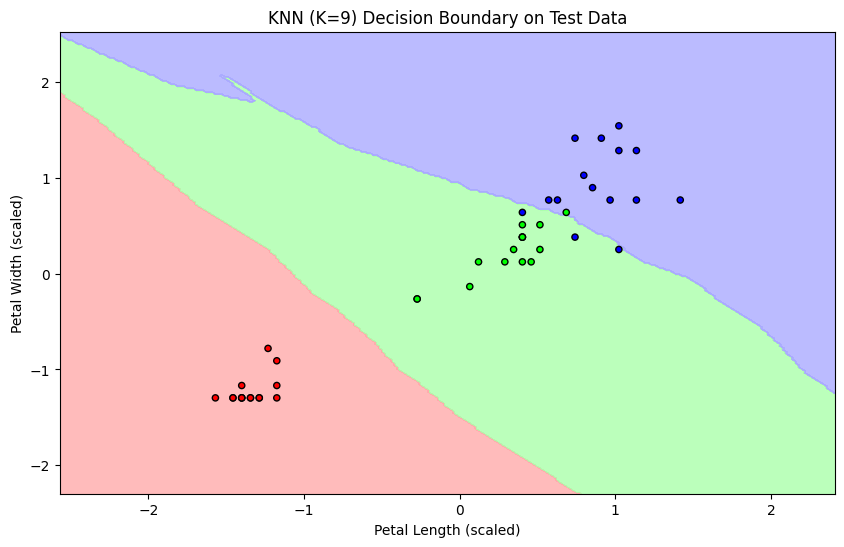

In [48]:
def plot_decision_boundaries(X, y, classifier, title):
    h = .02
    
    if y.dtype == 'object':
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
    else:
        y_encoded = y
    
    n_classes = len(np.unique(y_encoded))
    if n_classes == 2:
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    elif n_classes == 3:
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    else:
        cmap_light = plt.cm.Pastel1
        cmap_bold = plt.cm.Set1
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if Z.dtype == 'object':
        Z = le.transform(Z)
    else:
        Z = Z.astype(int)
    
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')
    plt.show()

plot_decision_boundaries(
    X_test_scaled, 
    y_test, 
    final_model, 
    f"KNN (K={best_k}) Decision Boundary on Test Data"
)